# Potential Energy Curve for a Homonuclear Diatomic Molecule



## Setup python environment and imports

In [1]:
%%capture
!pip install pyscf


In [6]:
# pyscf imports:
from pyscf import gto, scf, dft

from pyscf.data.nist import HARTREE2EV

# For plotting
import matplotlib
from matplotlib import pyplot as plt

# For numerics:
import numpy as np

/usr/local/lib/python3.10/dist-packages/pyscf/dft/libxc.py:772: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, the same to the B3LYP functional in Gaussian and ORCA (issue 1480). To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


## Definition of the Molecule

Here you should define the homonuclear diatomic molecule to be considered.



In [3]:
Atom="N"

## Definition of the Functions to Generate the XYZ Coordiates and Calculations

In [4]:
def get_xyz(bondlength,atom="N"):
  xyz="{:2s} {:10.6f} {:10.6f} {:10.6f}\n".format(atom,bondlength/2,0.0,0.0)
  xyz+="{:2s} {:10.6f} {:10.6f} {:10.6f}\n".format(atom,-bondlength/2,0.0,0.0)
  return xyz

In [5]:
def run_calculation_hf(xyz, basis="sto-3g"):
    """Calculate the energy (+ additional things like MO coefficients) with pyscf."""
    mol = gto.M(
        atom=xyz,
        basis=basis,
        unit="ANG",
        symmetry=True,
    )
    mol.build()
    mf = scf.RHF(mol)
    mf.kernel()
    return mf.e_tot

def run_calculation_dft(xyz, functional="b3lyp", basis="sto-3g"):
    """Calculate the energy (+ additional things like MO coefficients) with pyscf."""
    mol = gto.M(
        atom=xyz,
        basis=basis,
        unit="ANG",
        symmetry=True,
    )
    mol.build()
    mf = dft.RKS(mol)
    mf.xc = functional
    mf.kernel()
    return mf.e_tot

## DFT calculations with different functionals

In [10]:
bondlengths = np.linspace(0.8,2.5,50)

XC_Functionals=["LDA",
                "BLYP",
                "B3LYP",
                "SCAN",
            ]

energy_dft = []
for b in range(len(XC_Functionals)):
  energy_dft.append(np.zeros(bondlengths.size))

for i, bl in enumerate(bondlengths):
  xyz=get_xyz(bondlength=bl,atom=Atom)
  for k,e in enumerate(energy_dft):
    e[i] = run_calculation_dft(xyz,functional=XC_Functionals[k],basis="cc-pVDZ")

energy_dft_eV = []
for k,e in enumerate(energy_dft):
    e_eV = (e - np.min(e))*HARTREE2EV
    energy_dft_eV.append(e_eV)


converged SCF energy = -107.084977231852
converged SCF energy = -108.917306520375
converged SCF energy = -108.949522189646
converged SCF energy = -108.899629294296
converged SCF energy = -107.256873895819
converged SCF energy = -109.086798841071
converged SCF energy = -109.117476473123
converged SCF energy = -109.06842771777
converged SCF energy = -107.38952212737
converged SCF energy = -109.217275817467
converged SCF energy = -109.246282258926
converged SCF energy = -109.19814783777
converged SCF energy = -107.490371365805
converged SCF energy = -109.316181969597
converged SCF energy = -109.34339455488
converged SCF energy = -109.295917815141
converged SCF energy = -107.565486509719
converged SCF energy = -109.389575550767
converged SCF energy = -109.414880514637
converged SCF energy = -109.368070054092
converged SCF energy = -107.619823857376
converged SCF energy = -109.442404359365
converged SCF energy = -109.465696051786
converged SCF energy = -109.419477235958
converged SCF energy

### Analysis of Results

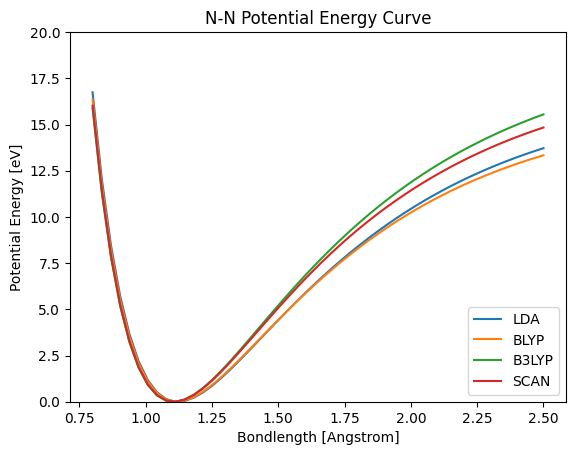

In [13]:
plt.figure(1)
for k,e_eV in enumerate(energy_dft_eV):
  plt.plot(bondlengths,e_eV,label=XC_Functionals[k])
plt.legend()
plt.ylim([0,20])
plt.xlabel("Bondlength [Angstrom]")
plt.ylabel("Potential Energy [eV]")
plt.title("{0}-{0} Potential Energy Curve".format(Atom))

plt.show()